# Feature Selection

**under construction**

*Selecting features is one of the most important steps in building an accurate and robust model.*

# False Discovery Rate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(42) # so we always get the same random numbers
N = 100
z_values = np.random.normal(size=N)

In [3]:
np.mean(z_values)
np.std(z_values)

0.9036161766446296

In [4]:
import scipy.stats as sst
normal_distribution = sst.norm(loc=0,scale=1.) #loc is the mean, scale is the variance.
p_values = normal_distribution.cdf(z_values)

Text(0, 0.5, 'p value')

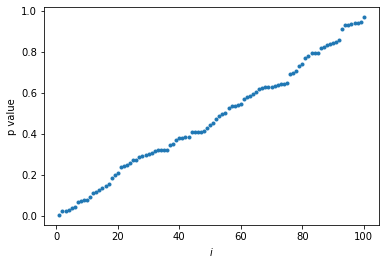

In [6]:
p_values = np.sort(p_values)
i = np.arange(1, N+1) # the 1-based i index of the p values, as in p(i)
plt.plot(i, p_values, '.')
plt.xlabel('$i$')
plt.ylabel('p value')

# Univariate Feature Selection

## Correlations

*Correlation quantifies the relationship between features. Linear correlation methods are robust and computationally efficient but detect only linear dependencies. 
Nonlinear correlation methods are able to detect nonlinear dependencies but need to be carefully parametrized.*

*A popular example for nonlinear correlation is the chi-square test for independence that can be applied to continuous features using historgram counts.* 

*Correlation does not imply causality.*

Covariance Matrix $C$:

$$ c_{ij} = \frac{1}{n-1} \sum_{k = 1}^{n} \left(x_k^{(i)} - \bar{x}^{(i)} \right) \left(x_k^{(j)} - \bar{x}^{(j)} \right)$$

The *Pearson correlation coefficient* compensates the effect of constant scaling by dividing the covariance by the product of the standard deviations of both features:
    
$$ s_{ij} = \frac{c_{ij}}{s^{(i)} s^{(j)}}$$

The standard deviations are the square roots of the variances, i.e. the square roots of the diagonal elements of the covariance matrix, $s^{(i)} = \sqrt{c_{ii}}$

In [7]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

In [8]:
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
df

,dogs,cats
0,0.2,0.3
1,0.0,0.6
2,0.6,0.0
3,0.2,0.1


In [9]:
df.corr(method=histogram_intersection)

,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


In [10]:
df.corr(method='pearson')

,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

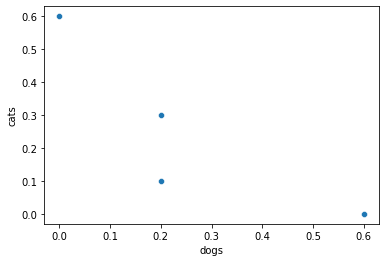

In [12]:
ax = sns.scatterplot(x="dogs", y="cats", data=df)

In [13]:
mu_dogs = df.dogs.mean()

In [14]:
np.sqrt((0.2- mu_dogs)**2 + (0.0 - mu_dogs)**2 + (0.6-mu_dogs)**2 + (0.2-mu_dogs)**2)/np.sqrt(4-1)

0.2516611478423583

In [15]:
df.dogs.std()

0.2516611478423583

In [16]:
df = pd.DataFrame([(.2, .04), (.0, .0), (.6, .36), (.2, .04)],
                  columns=['dogs', 'cats'])
df

,dogs,cats
0,0.2,0.04
1,0.0,0.00
2,0.6,0.36
3,0.2,0.04


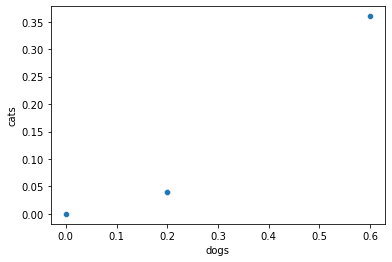

In [17]:
ax = sns.scatterplot(x="dogs", y="cats", data=df)

In [18]:
df.corr(method='pearson')

,dogs,cats
dogs,1.000000,0.963411
cats,0.963411,1.000000


In [19]:
df.corr(method='spearman')

,dogs,cats
dogs,1.0,1.0
cats,1.0,1.0


In [20]:
df.corr(method='kendall')

,dogs,cats
dogs,1.0,1.0
cats,1.0,1.0


## Chi-Square Test for Independence

We first compute the histograms of $x^{(1)}$ and $x^{(2)}$ for $r$ and $s$ bins.

Then we write the count as a matrix:

$$ H = \begin{pmatrix}
h_{11} & h_{12} & h_{13}\\
\cdot &  & \\
h_{r1} & h_{r2} & h_{rs}
\end{pmatrix}
$$

# Scatter Matrix

# Feature Significance

# Model-Bases Feature Selection

Idea: Make use of an intermediate model to determine which features are relevant.